<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_08_Aprendizaje_Automatico/BA_Complementario_Seaborn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

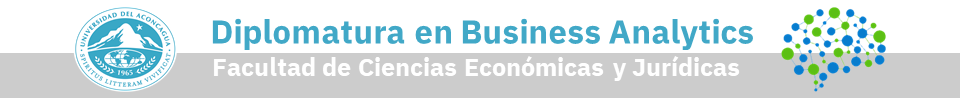

</center>

<center>
<font color="#41a8c7">
<h2><b>
Análisis Exploratorio de los Datos - Visualización - Seaborn

</font>
</center>

[Seaborn](https://seaborn.pydata.org/examples/index.html)

## **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_08_Aprendizaje_Automatico/"

In [3]:
archivo = "visualizacion.csv"

In [4]:
analisis = pd.read_csv(url+archivo)
analisis.rename(columns={"satisfaction_level":"niveldesatisfaccion",
                         "last_evaluation":"ultimaevaluacion",
                         "number_project":"numerosdeproyectos",
                         "average_montly_hours":"horasmensualespromedio",
                         "time_spend_company":"tiempoenlaempresa",
                         "Work_accident":"accidentedetrabajo",
                         "left":"abandono",
                         "promotion_last_5years":"promocionultimos5años",
                         "sales":"ventas",
                         "salary":"sueldo"}, inplace= True)

In [5]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   niveldesatisfaccion     14999 non-null  float64
 1   ultimaevaluacion        14999 non-null  float64
 2   numerosdeproyectos      14999 non-null  int64  
 3   horasmensualespromedio  14999 non-null  int64  
 4   tiempoenlaempresa       14999 non-null  int64  
 5   accidentedetrabajo      14999 non-null  int64  
 6   abandono                14999 non-null  int64  
 7   promocionultimos5años   14999 non-null  int64  
 8   ventas                  14999 non-null  object 
 9   sueldo                  14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## **Visualización de los datos**

### **Matriz de correlación**

In [6]:
analisiscorrelacion = round(analisis.corr(),3)
analisiscorrelacion

,niveldesatisfaccion,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio,tiempoenlaempresa,accidentedetrabajo,abandono,promocionultimos5años
niveldesatisfaccion,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
ultimaevaluacion,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
numerosdeproyectos,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
horasmensualespromedio,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
tiempoenlaempresa,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
accidentedetrabajo,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
abandono,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promocionultimos5años,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


### **Mapa de Calor** - Heatmap

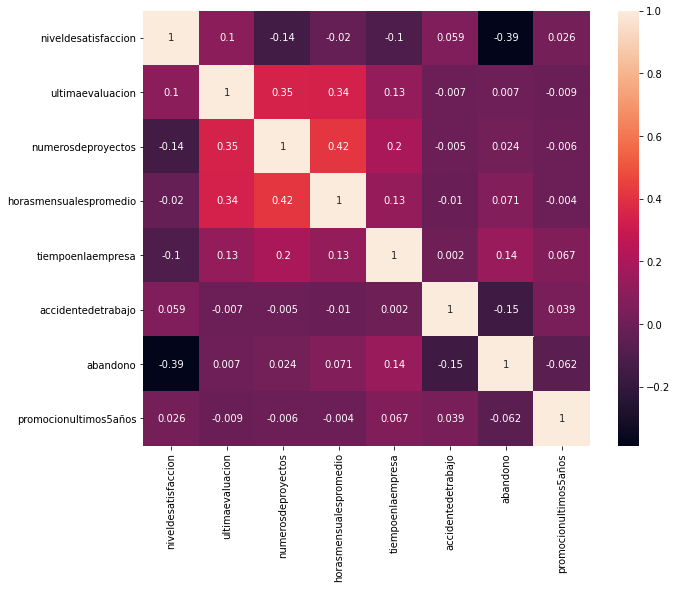

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(analisiscorrelacion, 
            annot=True)

plt.show()

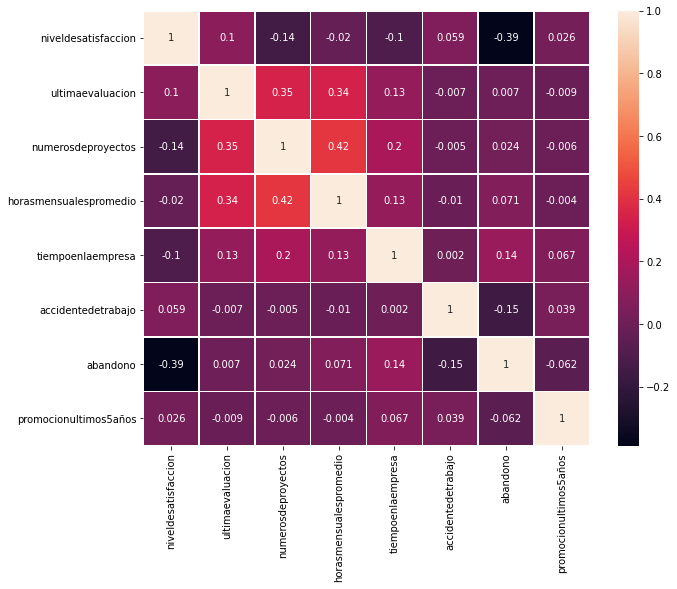

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(analisiscorrelacion, 
            annot=True,
            linewidths=.5)
plt.show()

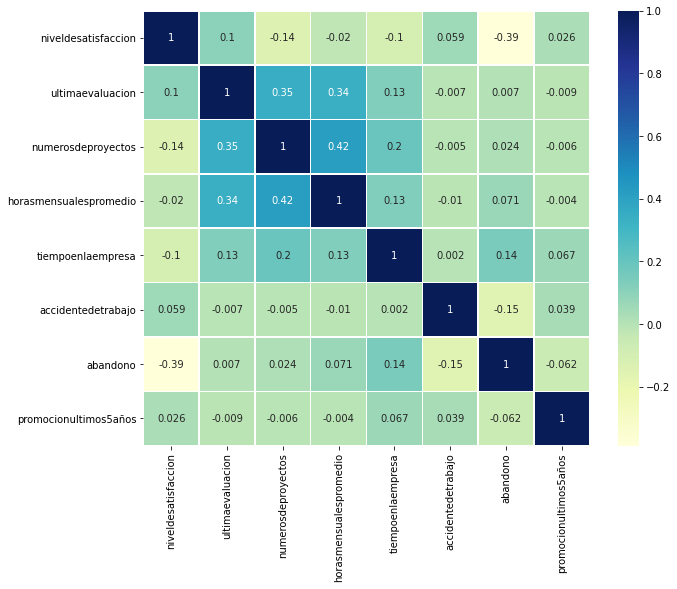

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(analisiscorrelacion, 
            annot=True,
            linewidths=.5,
            cmap="YlGnBu")
plt.show()

In [10]:
analisis2 = analisis.copy(deep=False)
analisis2.drop(["niveldesatisfaccion","tiempoenlaempresa","accidentedetrabajo",
                "promocionultimos5años","ventas","sueldo","abandono"], 
               axis=1, 
               inplace=True)

In [11]:
analisiscorrelacion2 = round(analisis2.corr(),3)
analisiscorrelacion2

,ultimaevaluacion,numerosdeproyectos,horasmensualespromedio
ultimaevaluacion,1.000,0.349,0.340
numerosdeproyectos,0.349,1.000,0.417
horasmensualespromedio,0.340,0.417,1.000


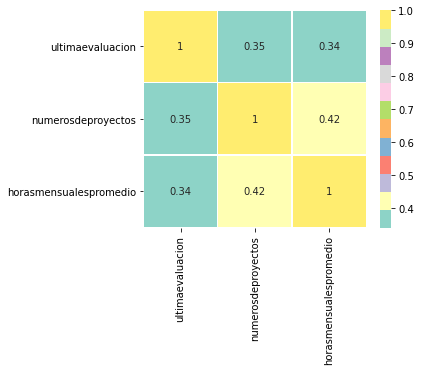

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(analisiscorrelacion2, 
            annot=True,
            linewidths=.5,
            cmap="Set3")
plt.show()

### **Scatterplot**

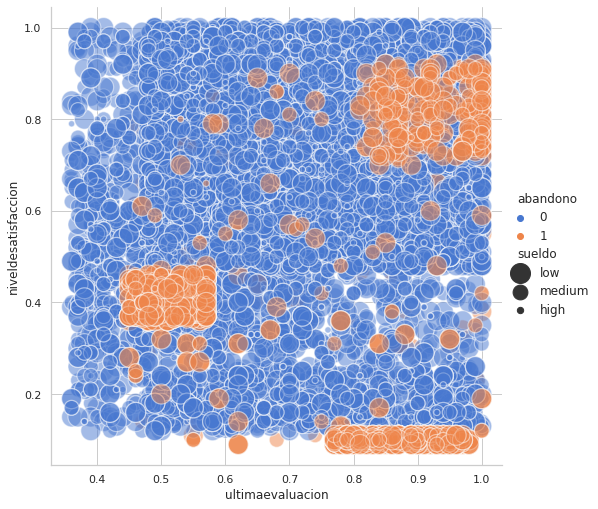

In [13]:
sns.set_theme(style="whitegrid")
sns.relplot(x="ultimaevaluacion", 
            y="niveldesatisfaccion", 
            hue="abandono", 
            size="sueldo",
            sizes=(40, 400), 
            alpha=.5, 
            palette="muted",
            height=7, 
            data=analisis)

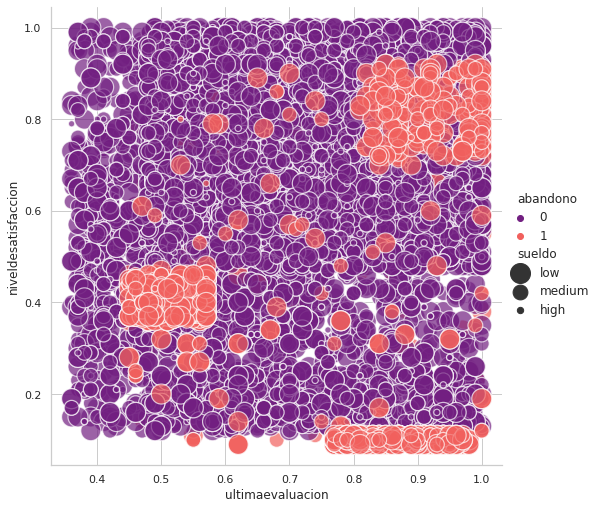

In [14]:
sns.set_theme(style="whitegrid")
sns.relplot(x="ultimaevaluacion", 
            y="niveldesatisfaccion", 
            hue="abandono", 
            size="sueldo",
            sizes=(40, 400), 
            alpha=.7, 
            palette="magma",
            height=7, 
            data=analisis)

### Matriz **Scatterplot**

In [15]:
analisis2 = analisis.copy(deep=False)
analisis2.drop(["niveldesatisfaccion","tiempoenlaempresa","accidentedetrabajo",
                "promocionultimos5años","ventas","sueldo"], axis=1, inplace=True)

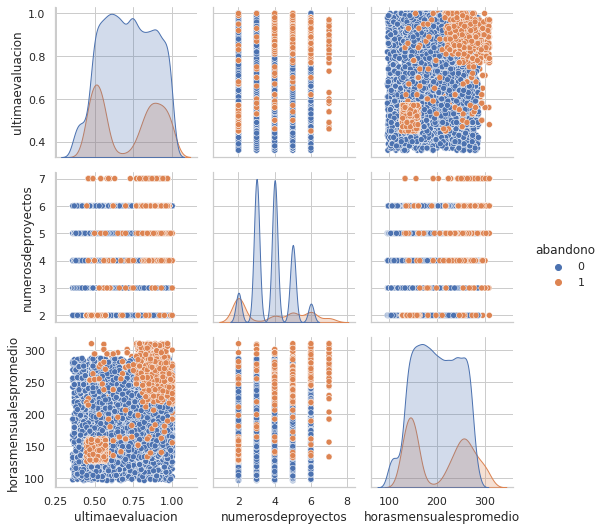

In [16]:
sns.pairplot(analisis2, 
             hue="abandono")

### Densidad **estimada**

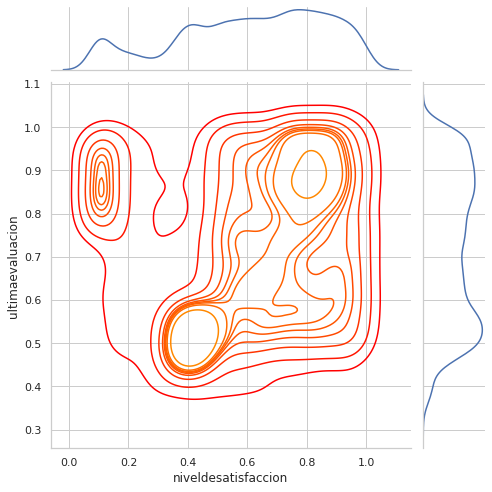

In [17]:
sns.jointplot(x="niveldesatisfaccion", 
              y="ultimaevaluacion", 
              data=analisis, 
              height=7,
              kind="kde",
              cmap="autumn")